In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from pandas.plotting import table
import datetime as dt
import matplotlib.pyplot as plt
import datetime as dt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
#create the engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
#Create the Base
Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()

['Hawaii_Weather']

In [4]:
weather_station = Base.classes.Hawaii_Weather

In [5]:
session=Session(engine)

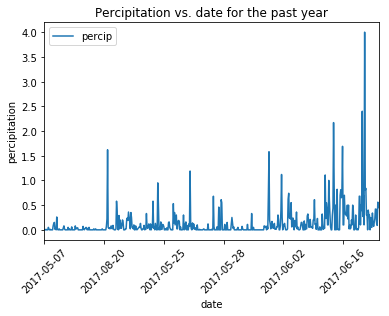

In [6]:
past_year = dt.date.today() - dt.timedelta(days=365)

past_year_prcp = session.query(weather_station.date, weather_station.prcp).filter(weather_station.date >= past_year).all()

prcp_df = pd.DataFrame(past_year_prcp, columns=['date', 'percip'])
prcp_df.set_index(prcp_df['date'], inplace = True)

prcp_df.plot()
plt.xticks(rotation="45")
plt.ylabel("percipitation")
plt.title("Percipitation vs. date for the past year")
plt.show()

In [7]:
prcp_df.describe()

,percip
count,561.000000
mean,0.130624
std,0.304464
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


In [8]:
session.query(weather_station.station).group_by(weather_station.station).count()

9

In [9]:
session.query(weather_station.station, func.count(weather_station.station)).group_by(weather_station.station).order_by(func.count(weather_station.station).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [10]:
session.query(func.min(weather_station.tobs), func.max(weather_station.tobs), func.avg(weather_station.tobs)).filter(weather_station.station == 'USC00519281').all()

[(54, 85, 71.66378066378067)]

In [11]:
data = session.query(weather_station.tobs).filter(weather_station.station == 'USC00519281').filter(weather_station.date >= past_year).all()
data

[(75),
 (70),
 (67),
 (74),
 (70),
 (75),
 (76),
 (77),
 (74),
 (74),
 (74),
 (69),
 (68),
 (76),
 (74),
 (71),
 (71),
 (74),
 (74),
 (74),
 (74),
 (80),
 (74),
 (72),
 (75),
 (80),
 (76),
 (76),
 (77),
 (75),
 (75),
 (75),
 (75),
 (72),
 (74),
 (74),
 (74),
 (76),
 (74),
 (75),
 (73),
 (79),
 (75),
 (72),
 (72),
 (74),
 (72),
 (72),
 (77),
 (71),
 (73),
 (76),
 (77),
 (76),
 (76),
 (79),
 (81),
 (76),
 (78),
 (77),
 (74),
 (75),
 (78),
 (78),
 (69),
 (72),
 (74),
 (74),
 (76),
 (80),
 (80),
 (76),
 (76),
 (76),
 (77),
 (77),
 (77),
 (82),
 (75),
 (77),
 (75),
 (76),
 (81),
 (82),
 (81),
 (76),
 (77),
 (82),
 (83),
 (77),
 (77),
 (77),
 (76),
 (76),
 (79)]

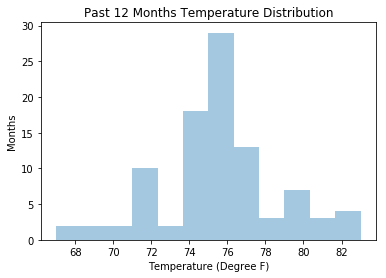

In [12]:
past_temp = session.query(weather_station.tobs).filter(weather_station.station == 'USC00519281').filter(weather_station.date >= past_year).all()
sns.distplot(past_temp, bins = 12, kde = False)
plt.title("Past 12 Months Temperature Distribution")
plt.ylabel("Months")
plt.xlabel("Temperature (Degree F)")
plt.show()

In [13]:
#Create Calc Temps Function

def calc_temps(startdate, enddate):
    return session.query(func.min(weather_station.tobs),  func.max(weather_station.tobs), func.avg(weather_station.tobs)).filter(weather_station.date >= startdate).filter(weather_station.date <= enddate).all()

print(calc_temps('2017-03-01', '2017-03-15'))

[(62, 82, 71.1829268292683)]


In [14]:
stuff = calc_temps('2017-03-01', '2017-03-15')
stuff[0][0]

62

In [15]:
min_temp = []
max_temp = []
avg_temp = []
years = ['2010','2011','2012','2013','2014','2015','2016','2017']

for year in years:
    temp_data = calc_temps(f'{year}-03-01', f'{year}-03-15')
    min_temp.append(temp_data[0][0])
    max_temp.append(temp_data[0][1])
    avg_temp.append(temp_data[0][2])
    


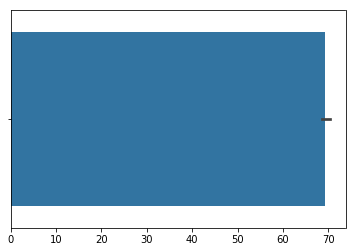

In [21]:
vaca_temp_df = pd.DataFrame(avg_temp)
temp_err = 
sns.barplot()
plt.show()